# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib

##### Excercise 1
Use the adult.csv dataset and run the codes shown in the following Screenshots. Then answer the questions.

In [6]:
import pandas as pd
import numpy as np
adult_df = pd.read_csv('adult.csv')
adult_df.set_index(np.arange(10000,42561),inplace=True)

print(adult_df.iloc[5:7,0:2])

print(adult_df.loc['10005':'10007','age':'fnlwgt'])

       age workclass
10005   37   Private
10006   49   Private
       age         workclass  fnlwgt
10005   37           Private  284582
10006   49           Private  160187
10007   52  Self-emp-not-inc  209642


    a) Use the output to answer what is the difference in the behavior of .loc and .iloc when it comes to slicing.
    b)	Without running but by only looking at the data, what will be the output of adult_df.loc['10000':'10003', 'relationship':'sex'].
    c)	Without running but by only looking at the data, what will be the output of adult_df.iloc[0:3, 7:9].


##### Excercise 2 

For adult_df use the .groupby() function to run the following code and create the multi-index Series mlt_sr.

In [7]:
import pandas as pd

adult_df = pd.read_csv('adult.csv')
mlt_seris =adult_df.groupby(['race','sex','income']).fnlwgt.mean()
mlt_seris

race                sex     income
Amer-Indian-Eskimo  Female  <=50K     109018.626168
                            >50K      148012.000000
                    Male    <=50K     126428.767857
                            >50K      120721.541667
Asian-Pac-Islander  Female  <=50K     148165.333333
                            >50K      142426.093023
                    Male    <=50K     163885.130435
                            >50K      170698.347639
Black               Female  <=50K     213411.580205
                            >50K      205806.033333
                    Male    <=50K     242343.990566
                            >50K      245390.356902
Other               Female  <=50K     173235.932039
                            >50K      160223.333333
                    Male    <=50K     214891.832168
                            >50K      204551.736842
White               Female  <=50K     183485.120961
                            >50K      184030.255837
                    Male    <

Now that you have created a multi-index Series, run the following codes, study the outputs, and answer the questions.

    a)	Run the code below first and then answer the following. When we use .iloc[] for a multi-index Series or DataFrame, what we should expect?

In [8]:
print(mlt_seris.iloc[0])
print(mlt_seris.iloc[1])
print(mlt_seris.iloc[2])

109018.6261682243
148012.0
126428.76785714286


Answer: 

    b)	Run the code below first and then answer the following. When we use .loc[] to access the data of one of the inner most index level of multi-index Series, what should we expect?

In [9]:
mlt_seris.loc['Other']

sex     income
Female  <=50K     173235.932039
        >50K      160223.333333
Male    <=50K     214891.832168
        >50K      204551.736842
Name: fnlwgt, dtype: float64

Answer: 

    c)	 Run the codes below first and then answer the following. When we use .loc[] to access the data of one of non inner most index level of multi-index Series, what should we expect? 

    When you run either line of code below, you will get an error and that is the point of this question. Study the error and try to answer the question. 

In [10]:
mlt_seris.loc['Female']

KeyError: 'Female'

In [ ]:
mlt_seris.loc['<=50K']

Answer: 

    d)	Run the codes below first and then answer the following. How is using .loc[] or .iloc[] different when working with a multi-index Series or a DataFrame?


In [ ]:
print(mlt_seris.loc['Other']['Female']['<=50K'])
print(mlt_seris.iloc[12])

173235.93203883496
173235.93203883496


Answer: 

##### Excercise 3
For this exercise you need to use a new dataset: billboard.csv. Visit https://www.billboard.com/charts/hot-100 and see the latest song rankings of the day. This dataset presents information and ranking of 317 song tracks in 80 columns. The first four columns are artist, track, time, and date_e. The first columns are intuitive descriptions of song tracks. The column date_e shows the date that the songs entered the hot-100 list. The rest of 76 columns are songs ranking at the end of each weeks from 'w1' to 'w76'. Download and read this dataset using pandas and answer the following questions.

    a)	Write one line of code that gives you a great idea of how many null values each column has. If there are any columns that have no non-null values drop them. 

    b)	With a for loop, draw and study the values in each of the remaining W columns.

Skipping column "artist" because it includes non-numeric characters.
Skipping column "track" because it includes non-numeric characters.
Skipping column "time" because it includes non-numeric characters.
Skipping column "date_e" because it includes non-numeric characters.
Skipping column "w1" because it includes non-numeric characters.


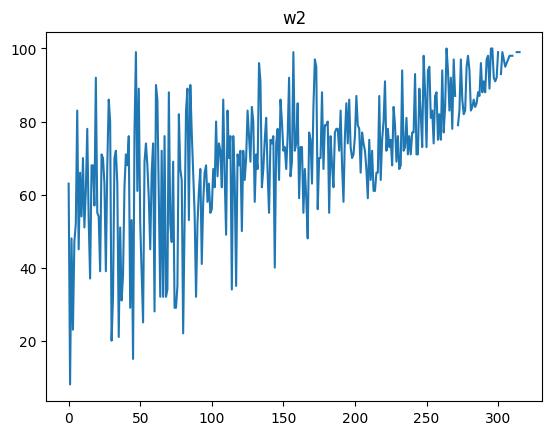

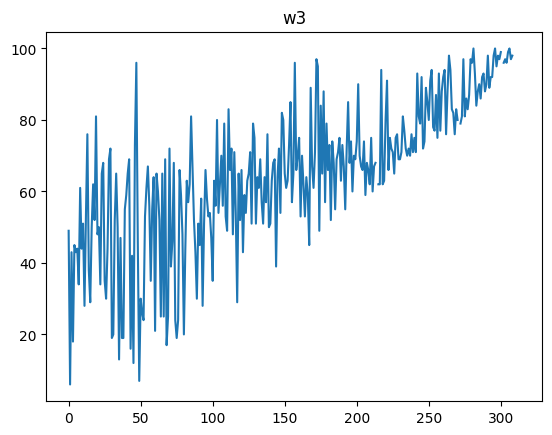

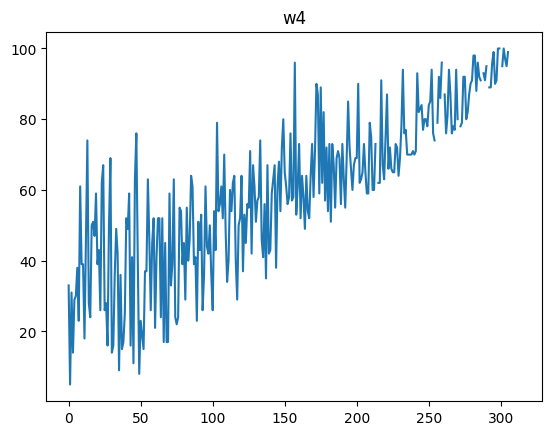

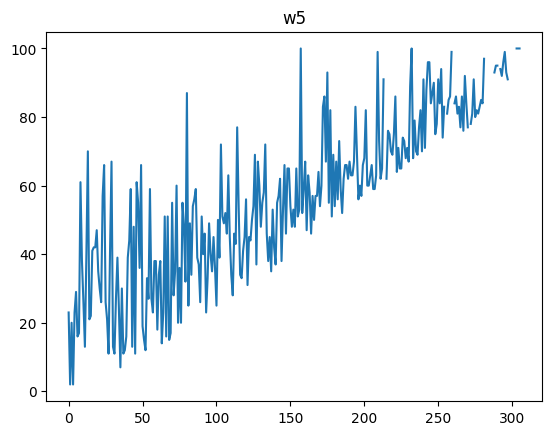

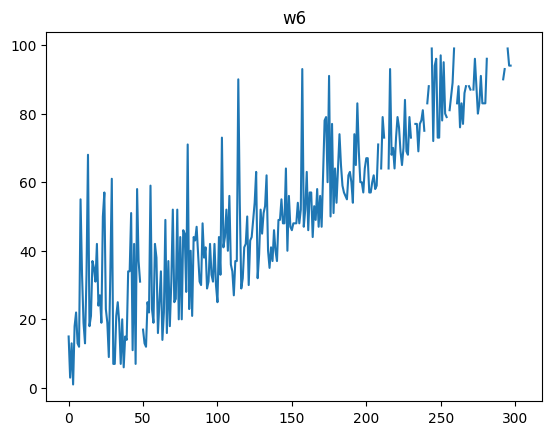

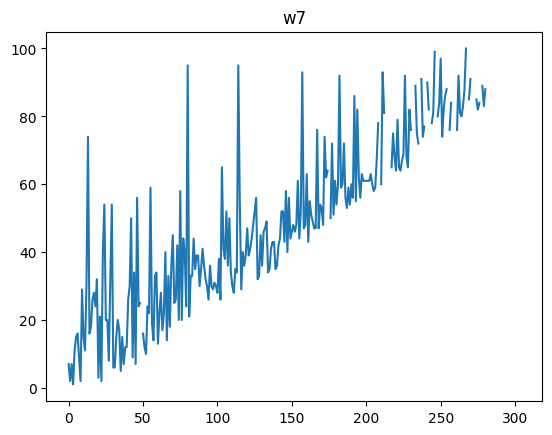

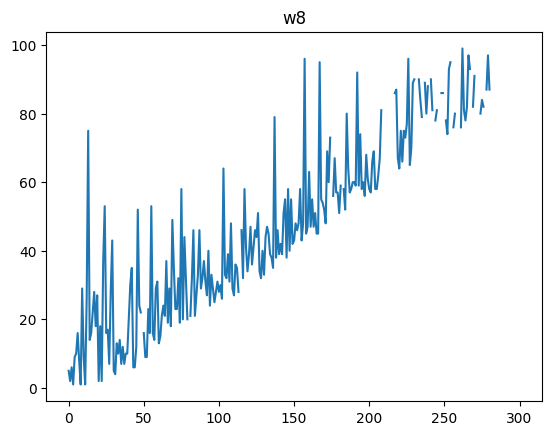

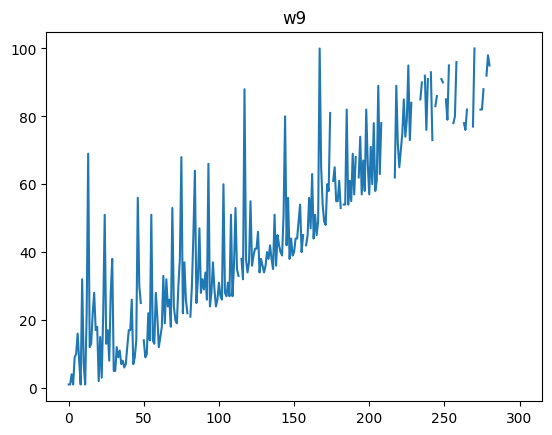

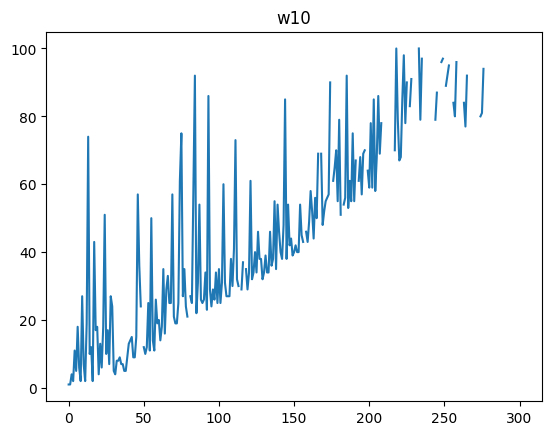

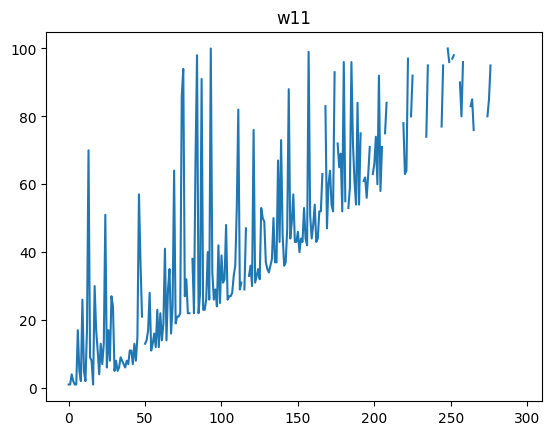

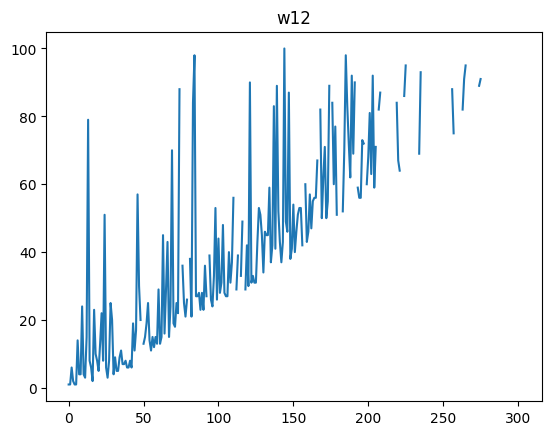

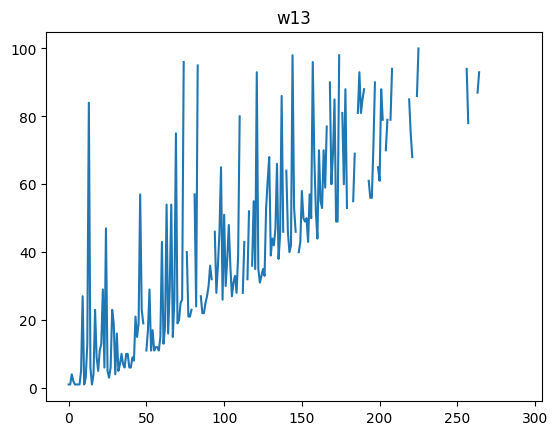

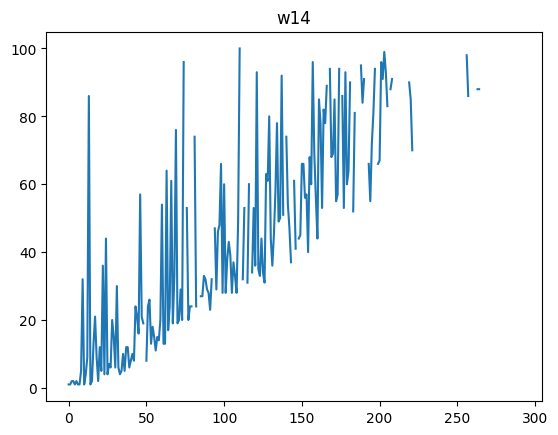

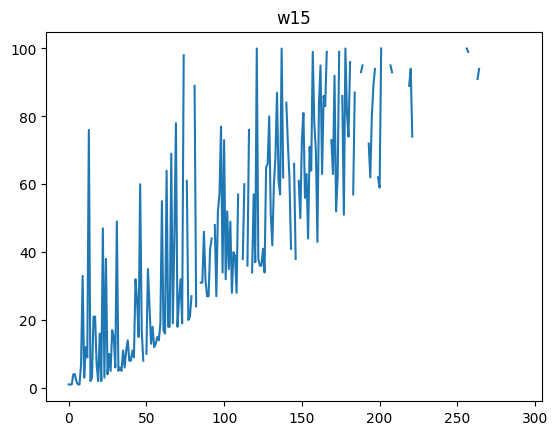

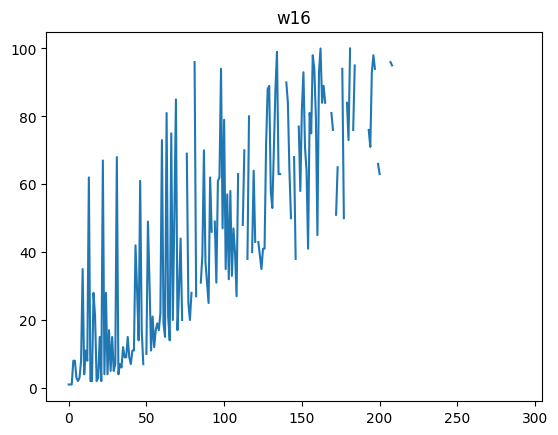

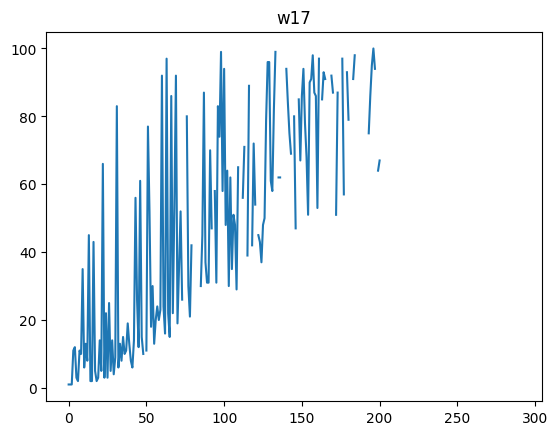

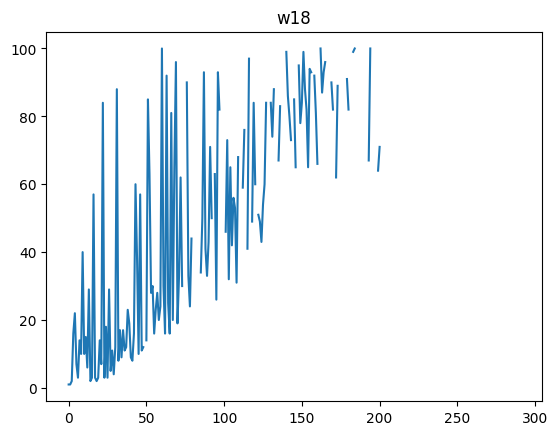

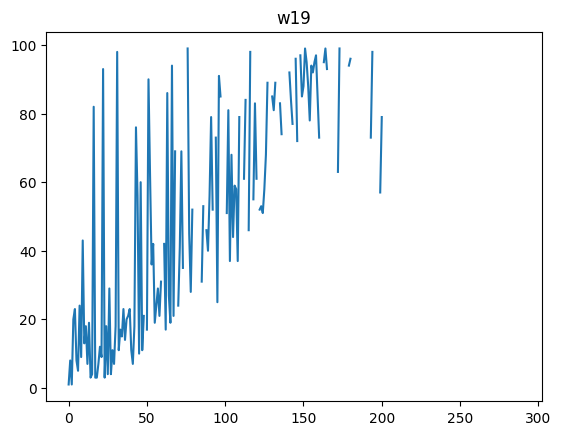

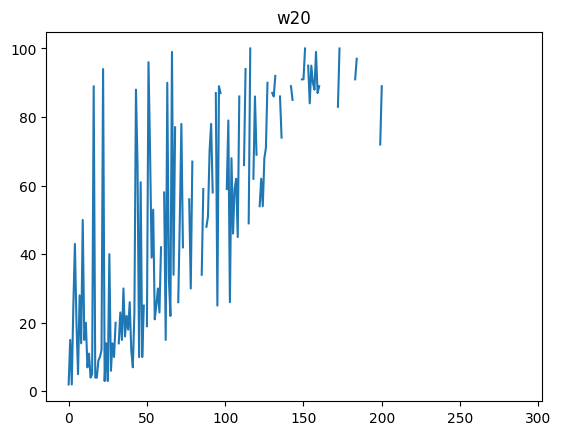

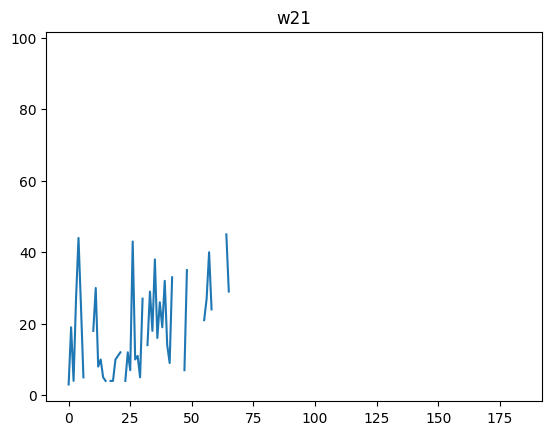

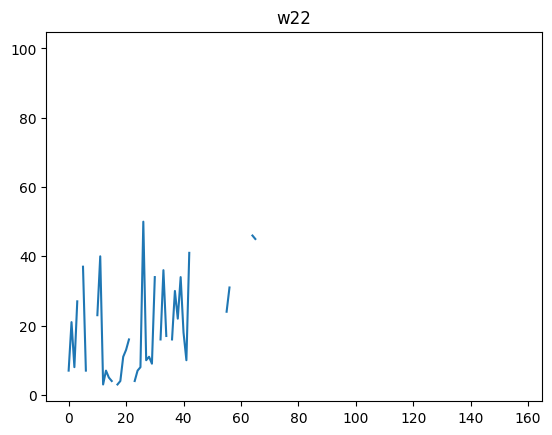

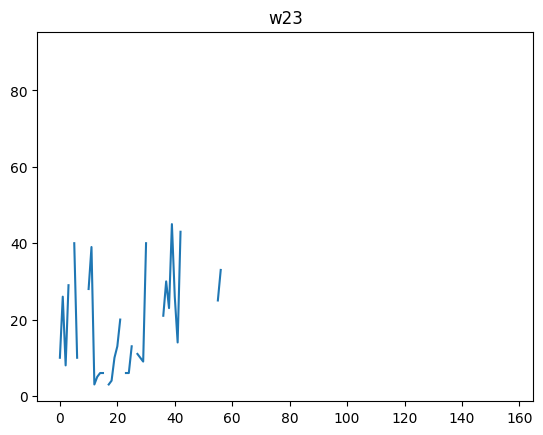

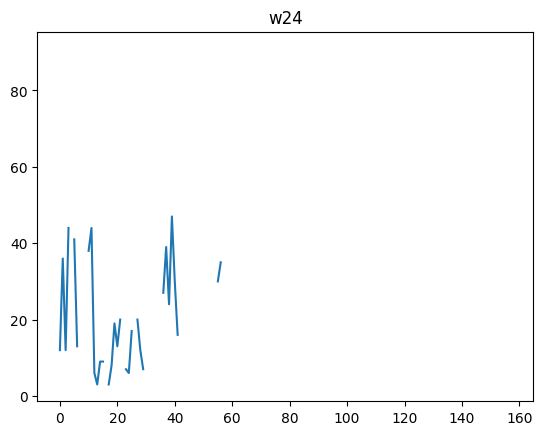

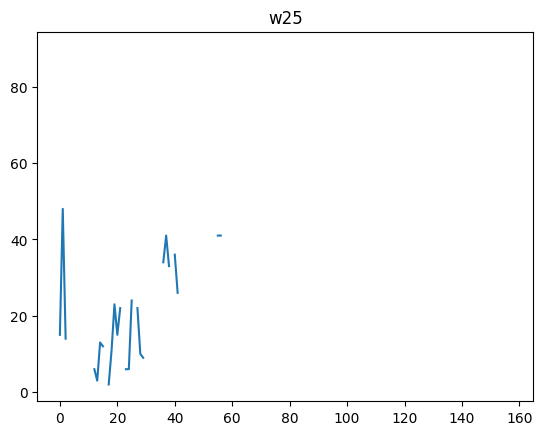

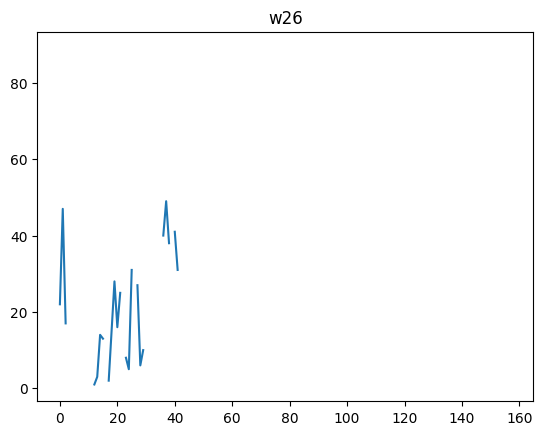

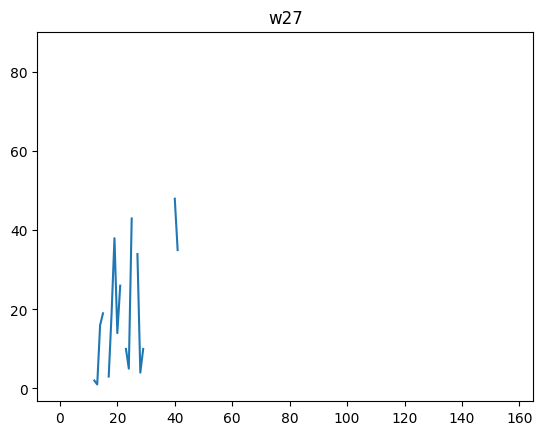

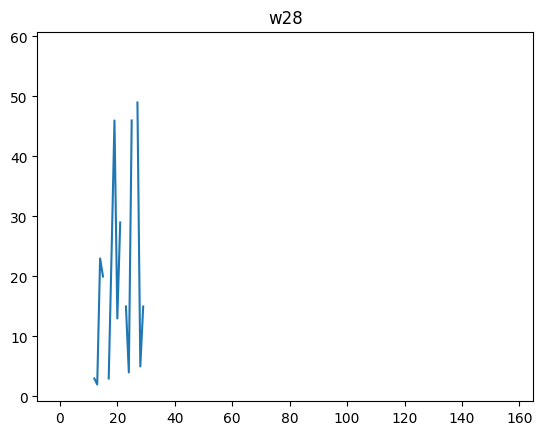

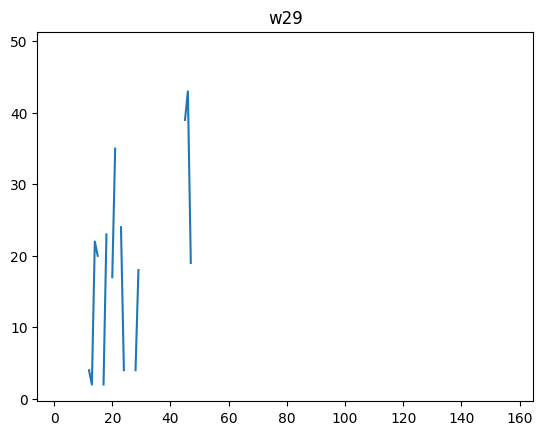

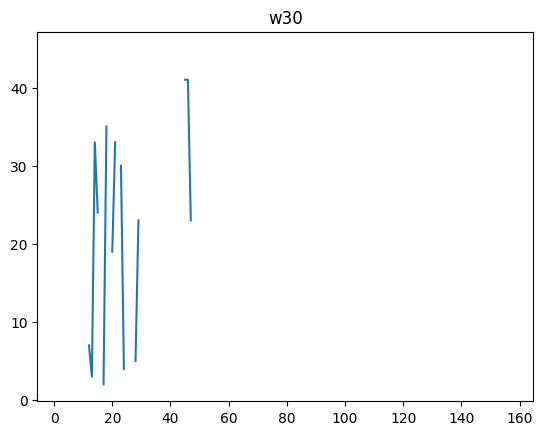

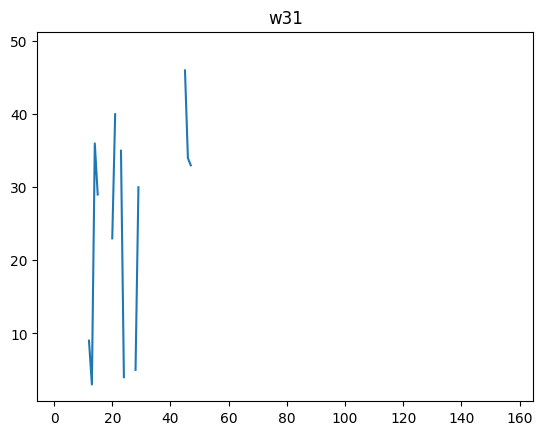

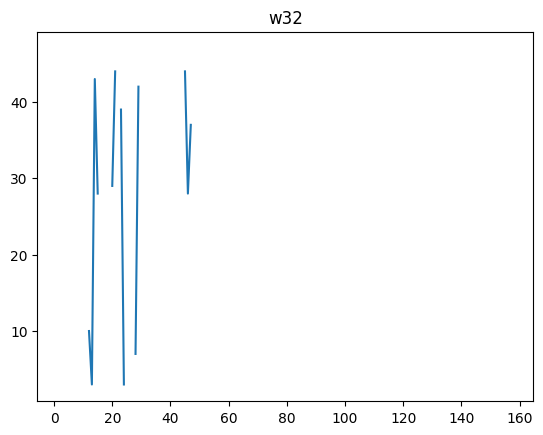

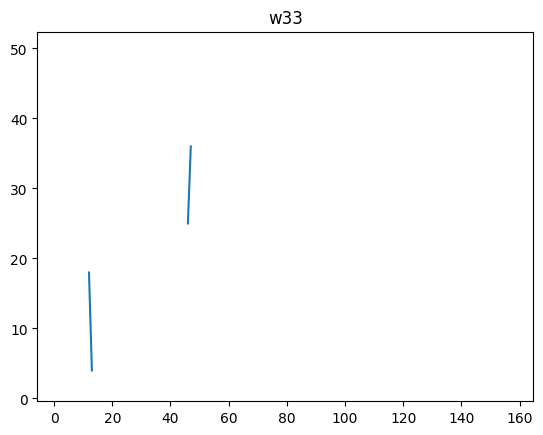

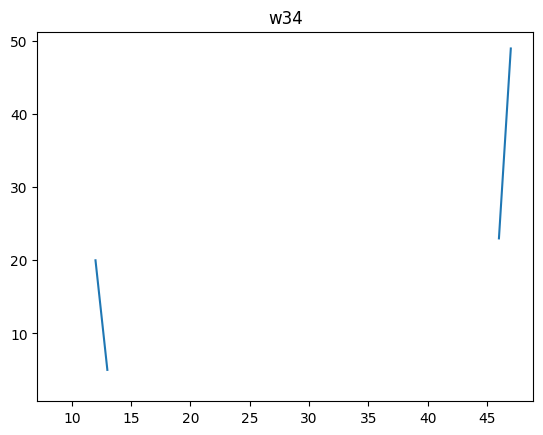

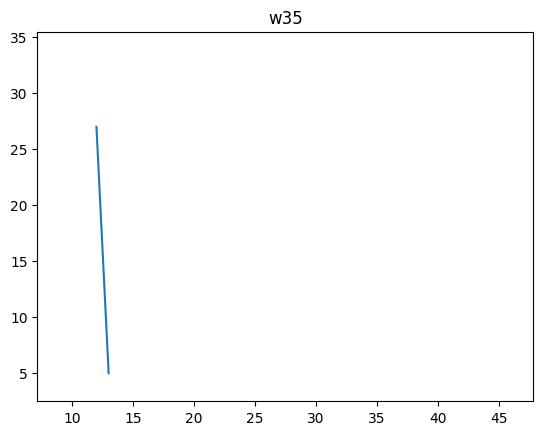

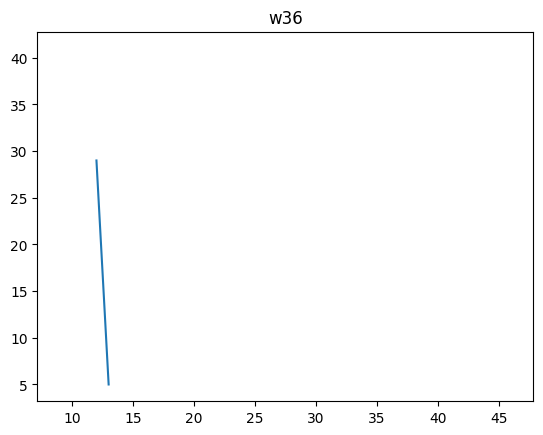

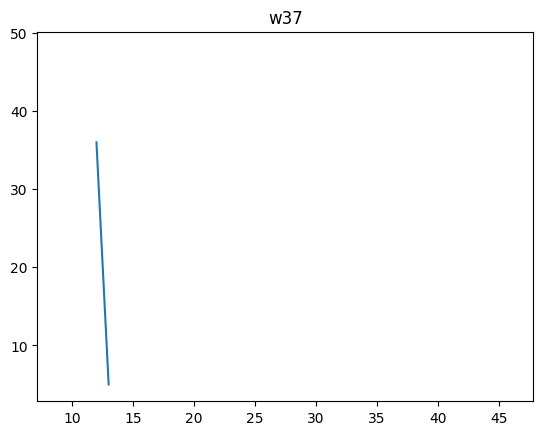

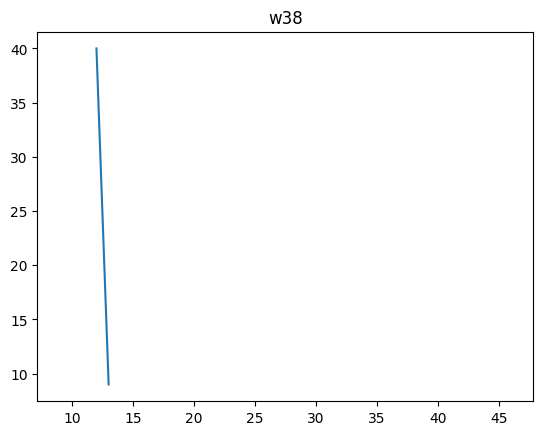

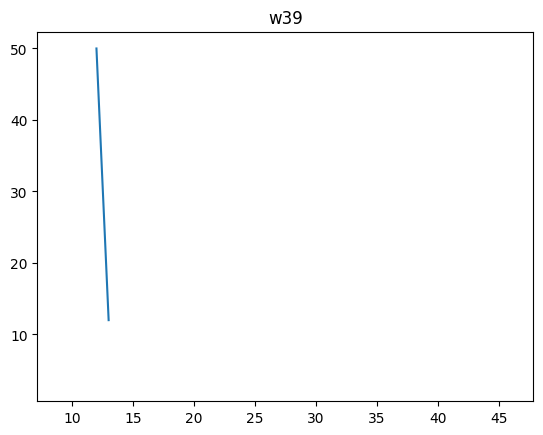

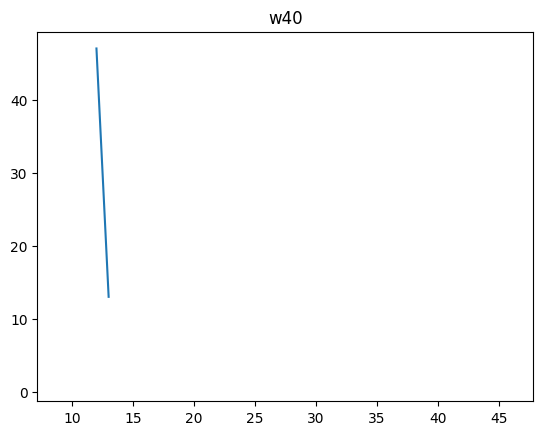

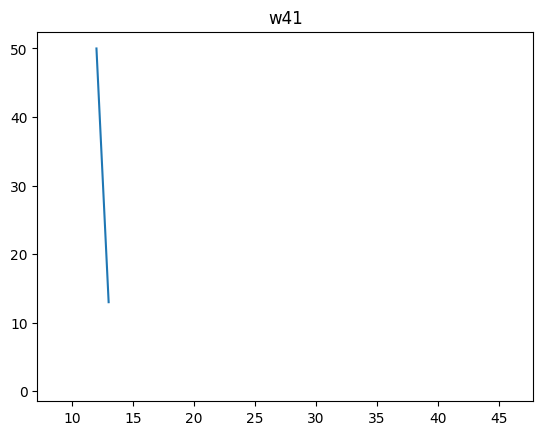

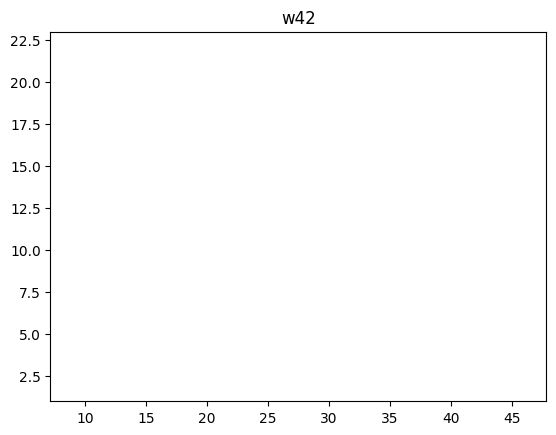

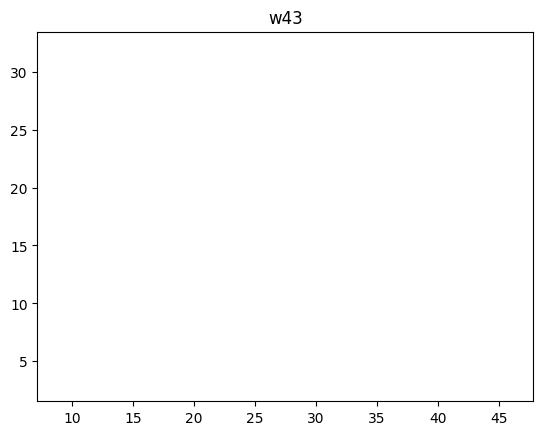

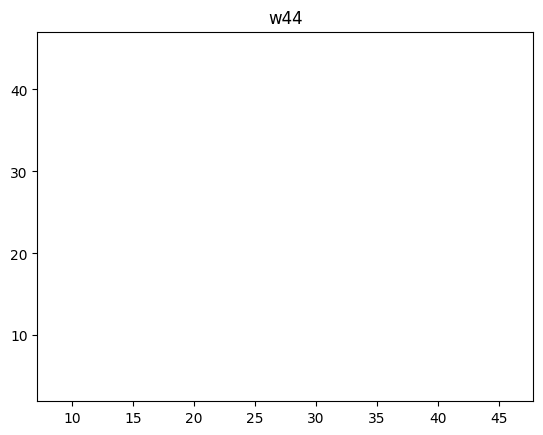

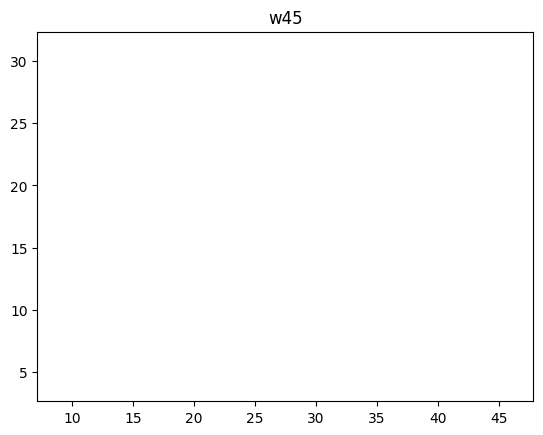

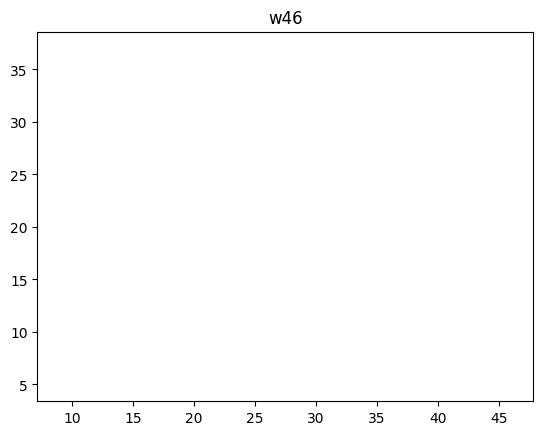

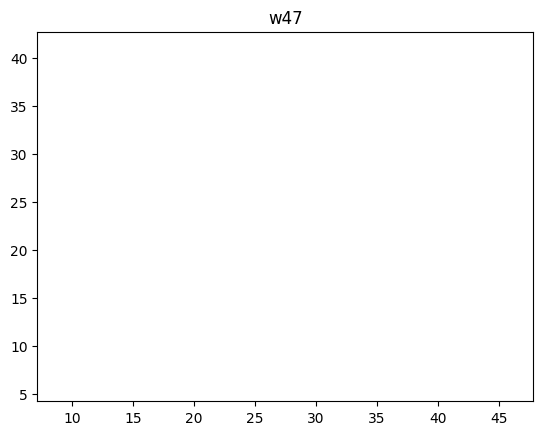

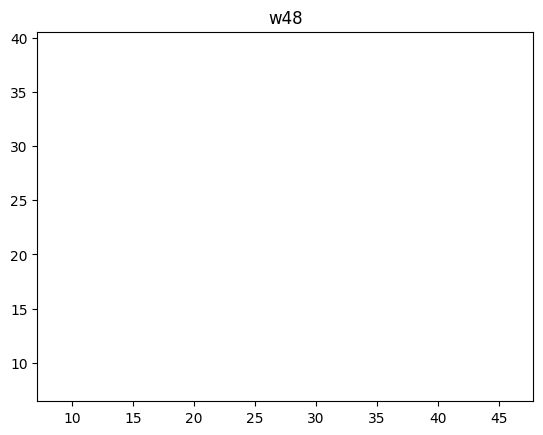

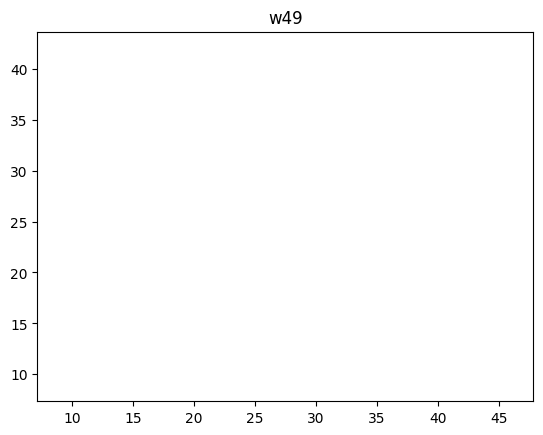

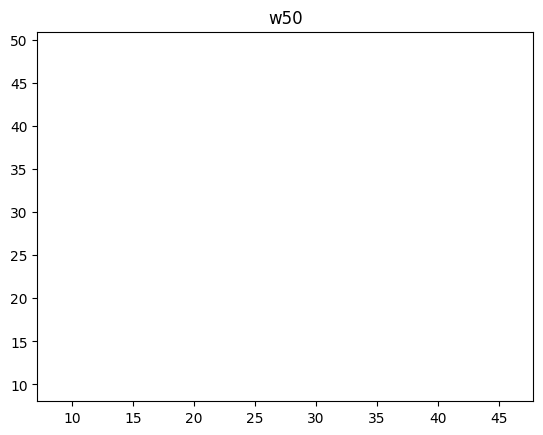

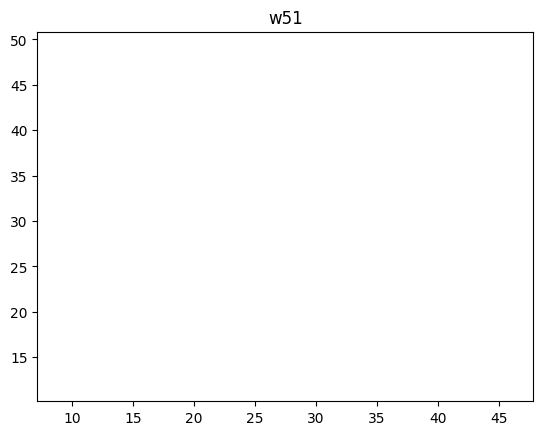

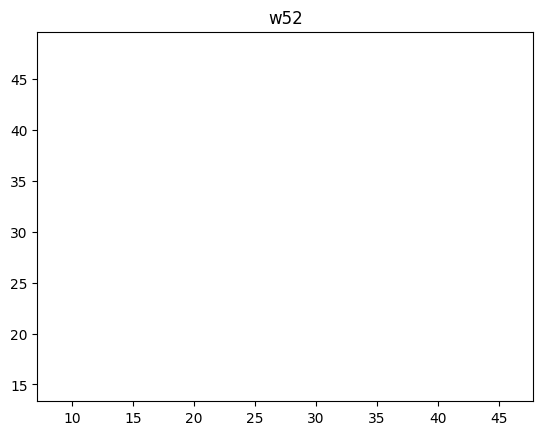

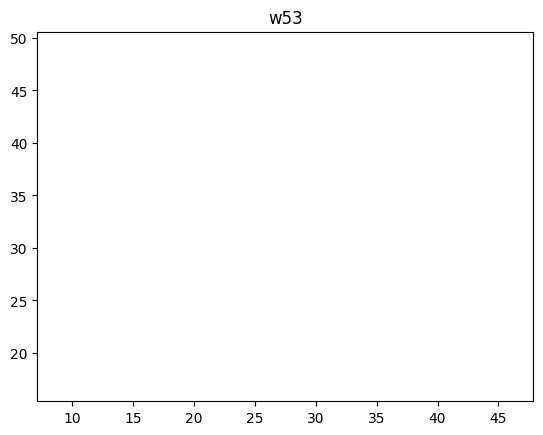

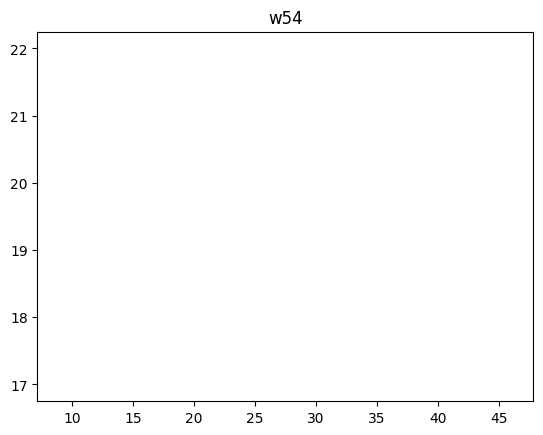

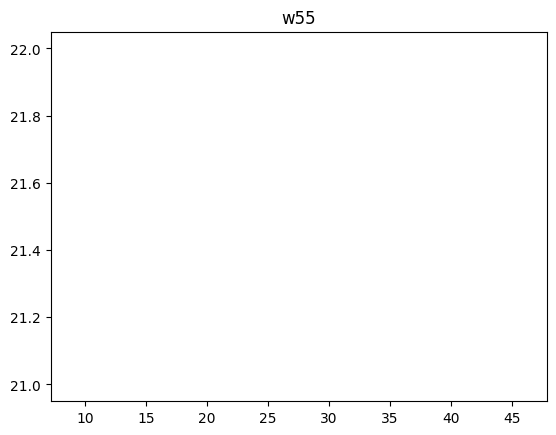

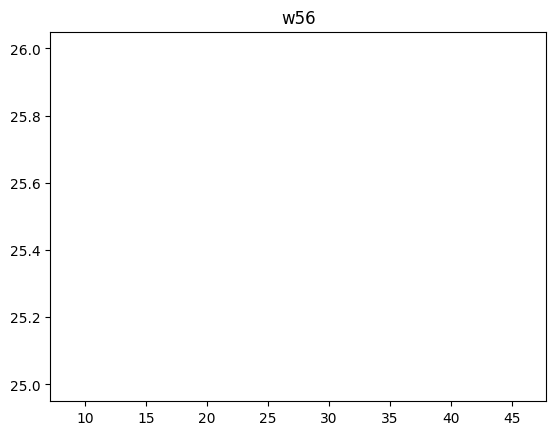

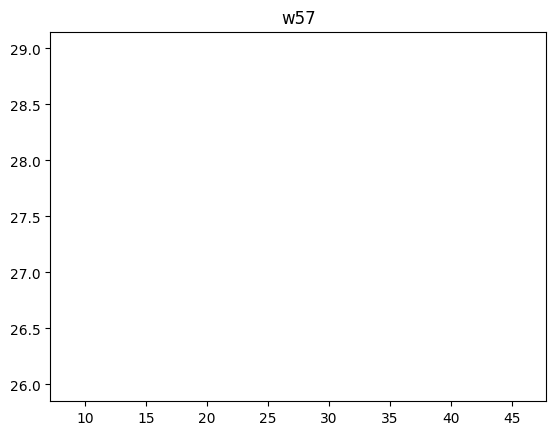

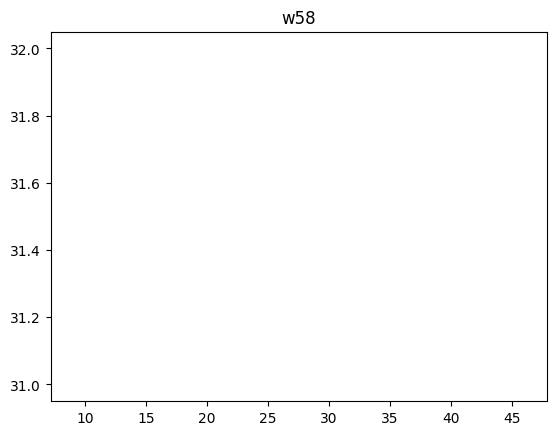

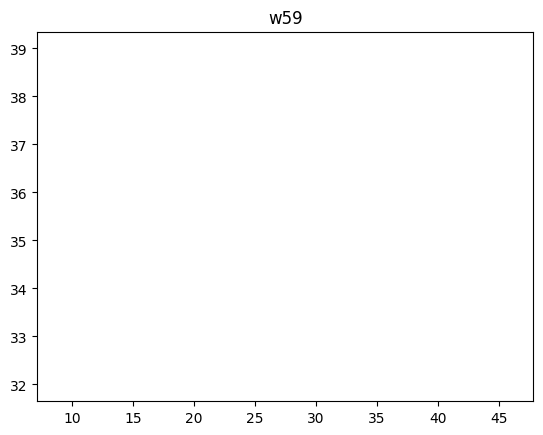

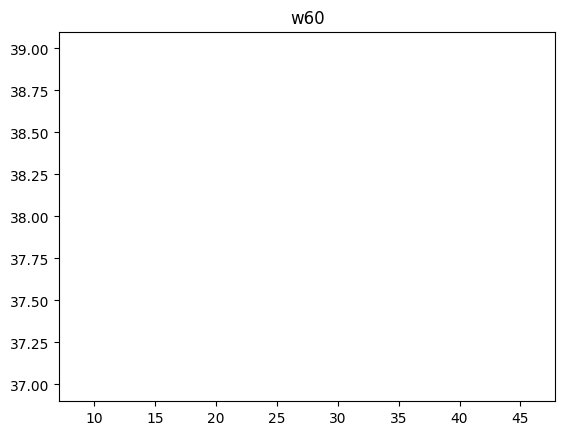

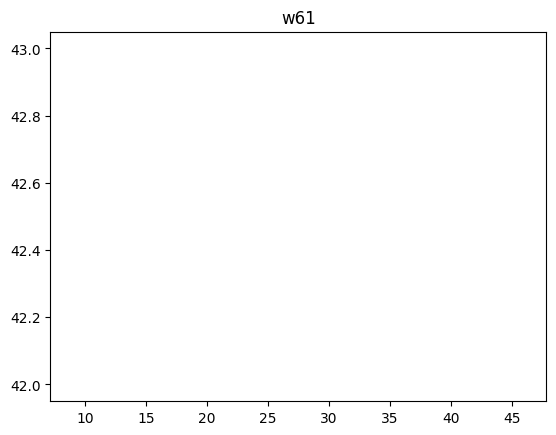

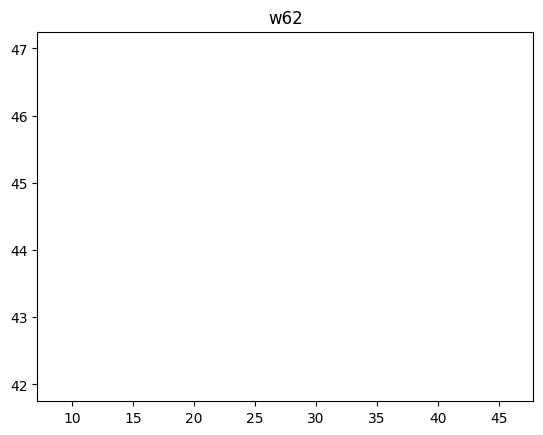

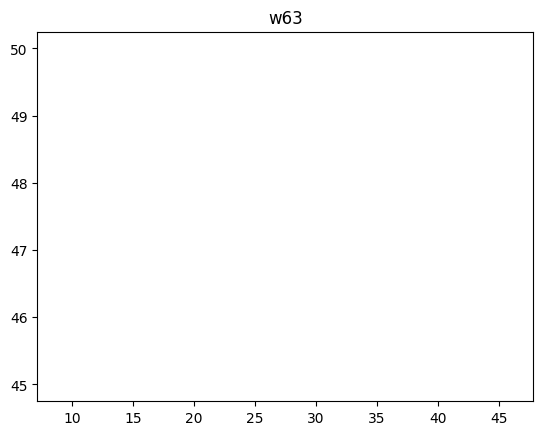

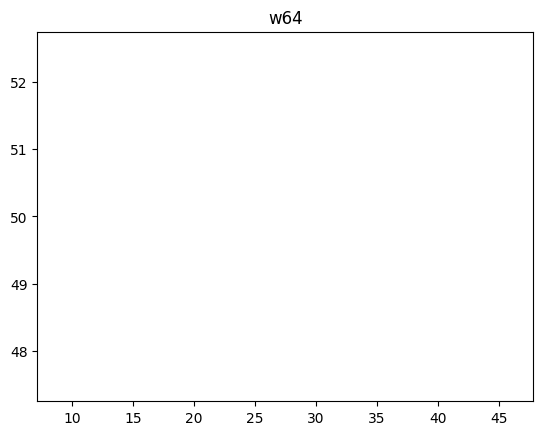

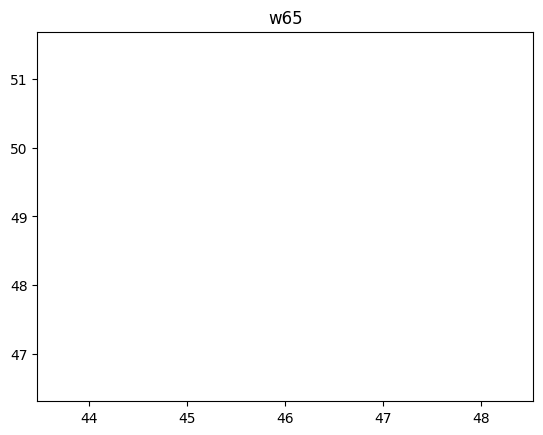

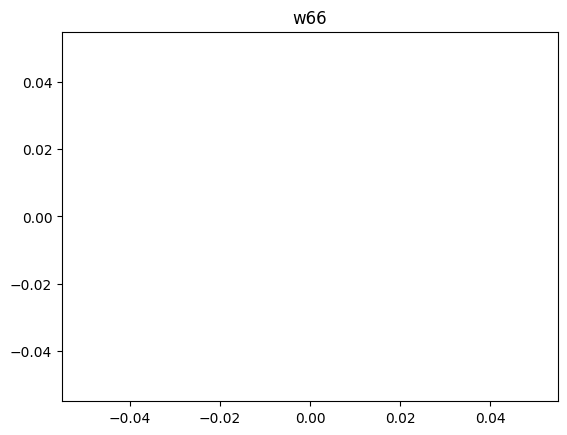

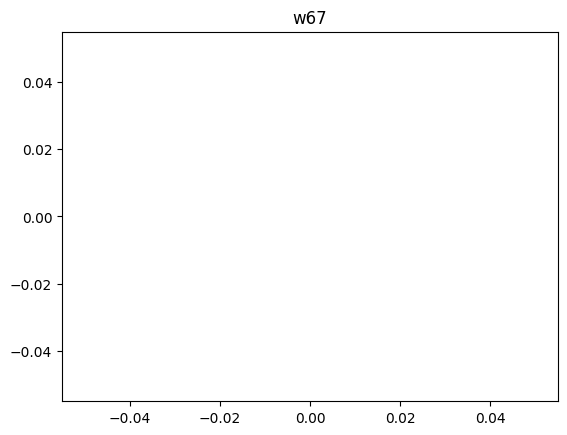

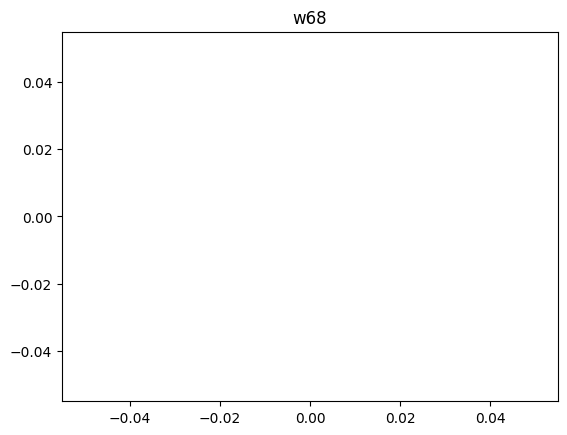

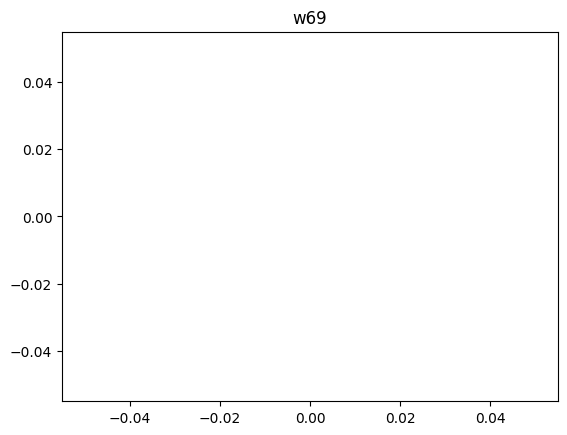

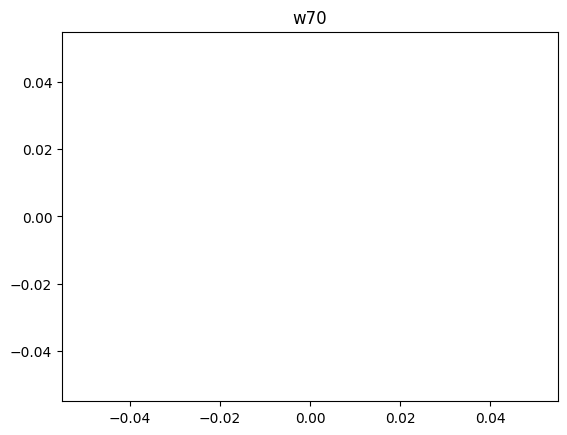

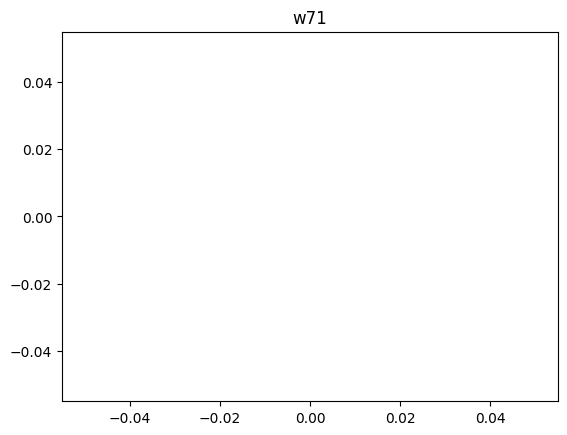

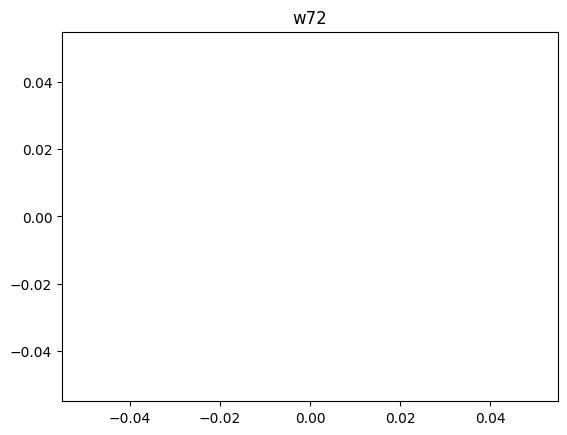

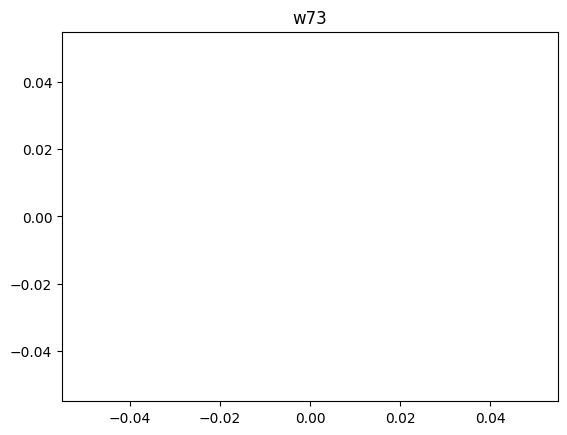

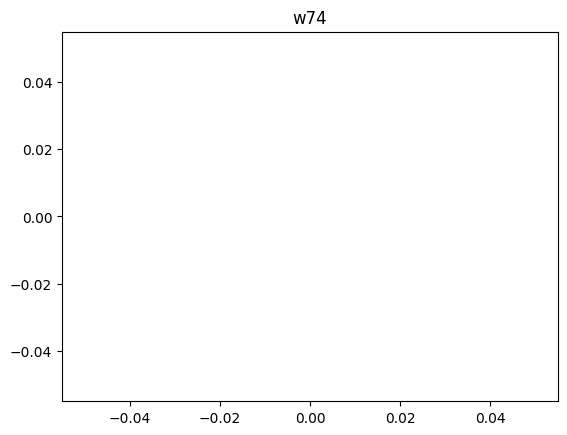

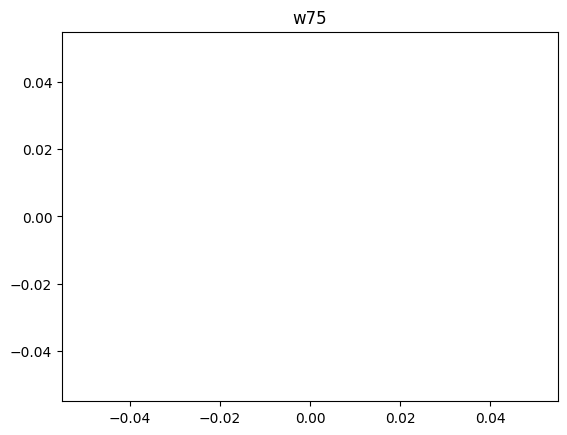

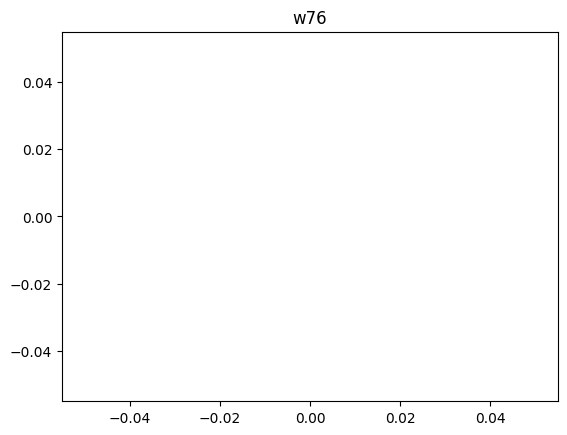

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('billboard.csv')

for column in df.columns:
    if df[column].dtype in [int, float]:
        df[column].plot()
        plt.title(column)
        plt.show()
    else:
        print(f'Skipping column "{column}" because it includes non-numeric characters.')


    c)	The dataset is in wide format, use an appropriate function to switch to a long fromat, and name the melted dataframe mlt_df.

    d)	Write a code that shows mlt_df‘s every 1200 rows.

    e)	Run the following code first and answer the question. Could you have done this by using Boolean masking too?

In [ ]:
mlt_df.query('artist == "Spears, Britney"')

Could have done this by using Boolean masking too?

Answer:

    f)	 Use either the approach in e or the Boolean mask, to extract all the unique songs that Britney Spears has in this dataset.

    g)	In mlt_df show all of the weeks that the song “Oops!.. I Did It Again” was on the top-100

##### Excercise 4 

We will use LaqnData.csv for this exercise. Each row of this dataset shows an hourly measurement recording of one of the five following air pollutants: NO, NO2, NOX, PM10, and PM2.5. The data was collected in a location in Londan for the entirety of year 2017. Read the data using Pandas and perform the following tasks.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

air_df = pd.read_csv('LaqnData.csv')
air_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


    a)	The dataset has 6 columns. Three of them, naming ‘Site','Units','Provisional or Ratified' are not adding any informational values as they are the same across the whole dataset. Use the following code to drop them. 

In [ ]:
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)

    b)	The dataset is in a long format. Apply the appropriate function to switch it to the wide format. Name the transformed Dataframe, pvt_df. 

    c)	Draw and study the histogram and boxplots for columns of pvt_df.

##### Excercise 5 

We will continue working with LaqnData.csv. 

    a)	Run the following code, see its output, and then study the code to answer what each line of this code does.

In [ ]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df

,Species,Value,Day,Month,Time
0,NO,3.5,01,01,00:00
1,NO,3.6,01,01,01:00
2,NO,2.2,01,01,02:00
3,NO,2.1,01,01,03:00
4,NO,3.3,01,01,04:00
...,...,...,...,...,...
43795,PM2.5,-2.0,31,12,19:00
43796,PM2.5,6.0,31,12,20:00
43797,PM2.5,5.0,31,12,21:00
43798,PM2.5,5.0,31,12,22:00


Answer: 

    b)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [ ]:
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df


Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

Answer:

    c)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [ ]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Answer:

    d)	Compare the output of the code above with pvt_df from Exercise 4. Are they basically the same?
    e)	Explain what are the differences and similarities between the pair .melt()/.pivot() and the pair .stack()/.unstack()? 
    f)	If you were to choose one counterpart for .melt() between .stack()/.unstack() which one would you choose?

Answer:

